In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import json
import torch
import pandas as pd

import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib import pyplot as plt
%matplotlib inline

import tsvar
tsvar.plotting.set_neurips_matplotib_rcparams()

In [3]:
output_df = tsvar.plotting.load_outputs(exp_dir="../output/dimRegime-gb-setting-2/")

Process file: ../output/dimRegime-gb-setting-2/1590953832-g03-d50-n500000/output-03.json...


In [4]:
def build_Id(row):
    return os.path.join(os.path.split(row['expId'])[1], row['outputIdx'])
output_df['Id'] = output_df.apply(build_Id, axis=1)

print(output_df.shape)
output_df.head()

(98, 25)


,vi_as_po,vi_ar_po,vi_bs_po,vi_br_po,vi_conv,vi_history,vi_adj_mode,vi_adj_mean,gb_baseline,gb_beta,...,outputIdx,dim_o,baseline,beta,adjacency,dim,max_jumps,sim_seed_list,gen_seed,Id
0,"[[317.82869657440693, 1120.6014358959574, 1124...","[[36024.77734375, 36030.7890625, 36017.0898437...","[[23.71859206098263, 159.39365931547977, 281.2...","[[25.5562685266375, 200.79896999518726, 341.49...",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[0.009627458339653092, 0.15571151975096156, 0...","[[0.009474778968989565, 0.15551844726662778, 0...","[0.037818510052225515, 0.045396161153390346, 0...","[2.393371911214989, 2.156890815364304, 1.55315...",...,output-00.json,5,"[0.0174, 0.0252, 0.0405, 0.029, 0.0238]","[[0.5047, 0.9389, 0.293, 0.7674, 0.3134], [0.3...","[[0.0, 0.20341368995248987, 0.2322716874890023...",5,50000,"[1102425069, 465133964, 1204017264, 2033716925]",1782336004,1590953815-g00-d05-n050000/output-00.json
1,"[[631.56554757411, 876.4904451300749, 1316.651...","[[36762.0546875, 36760.40625, 36755.21875, 367...","[[9.964881833264828, 182.85177708002405, 250.2...","[[10.003356095491469, 267.397219753294, 382.16...",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[1.5422159793637187e-05, 0.17788214636285032,...","[[-0.0, 0.1776814587594192, 0.2484511127336875...","[0.035266481369728195, 0.04654889761424664, 0....","[2.439177212728035, 2.0923143216625784, 1.6507...",...,output-01.json,5,"[0.0174, 0.0252, 0.0405, 0.029, 0.0238]","[[0.5047, 0.9389, 0.293, 0.7674, 0.3134], [0.3...","[[0.0, 0.20341368995248987, 0.2322716874890023...",5,50000,"[1102425069, 465133964, 1204017264, 2033716925]",1782336004,1590953815-g00-d05-n050000/output-01.json
2,"[[515.1114471149472, 987.3363919010609, 1465.9...","[[36643.8671875, 36650.609375, 36653.6875, 366...","[[9.964715939870715, 146.27150227118074, 225.9...","[[10.006289455341552, 171.4827509689145, 271.6...",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[1.4882537526356529e-05, 0.1445299799736625, ...","[[-0.0, 0.14434105562979455, 0.224453606087008...","[0.03727115005925801, 0.04526170851316163, 0.0...","[2.4763154326802788, 2.075069972857667, 1.6468...",...,output-02.json,5,"[0.0174, 0.0252, 0.0405, 0.029, 0.0238]","[[0.5047, 0.9389, 0.293, 0.7674, 0.3134], [0.3...","[[0.0, 0.20341368995248987, 0.2322716874890023...",5,50000,"[1102425069, 465133964, 1204017264, 2033716925]",1782336004,1590953815-g00-d05-n050000/output-02.json
3,"[[639.9810767858422, 955.0188363218642, 1238.1...","[[36232.0625, 36223.71875, 36215.90625, 36240....","[[9.965126380890037, 172.73806505102354, 290.2...","[[10.006395881187265, 254.39917426406998, 456....",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[1.517840226196874e-05, 0.1681477139000803, 0...","[[-0.0, 0.16794181232673094, 0.291161807362889...","[0.035982810794275136, 0.04583027115501827, 0....","[2.4073829446189796, 2.1600343164485323, 1.645...",...,output-03.json,5,"[0.0174, 0.0252, 0.0405, 0.029, 0.0238]","[[0.5047, 0.9389, 0.293, 0.7674, 0.3134], [0.3...","[[0.0, 0.20341368995248987, 0.2322716874890023...",5,50000,"[1102425069, 465133964, 1204017264, 2033716925]",1782336004,1590953815-g00-d05-n050000/output-03.json
4,"[[1264.0484386134412, 1789.7474858322375, 677....","[[37766.76171875, 37766.875, 37766.37890625, 3...","[[565.8474468468299, 9.962049988230133, 608.27...","[[581.0018768024253, 10.010376963158869, 1110....",True,"{'iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, ...","[[0.2989654975159159, 1.0317838425588808e-05, ...","[[0.2988483581409491, -0.0, 0.2681988195721606...","[0.071955408998329, 0.13803338026617068, 0.106...","[1.2662022367272936, 0.6926480103306063, 0.906...",...,output-00.json,5,"[0.0325, 0.018, 0.0118, 0.0227, 0.0333]","[[0.1932, 0.6007, 0.6428, 0.0322, 0.3222], [0....","[[0.34574712643678157, 0.0, 0.2540229885057471...",5,50000,"[404519849, 835515020, 320193192, 249627212]",1288084029,1590953815-g04-d05-n050000/output-00.json


In [5]:
output_df.columns.to_list()

['vi_as_po',
 'vi_ar_po',
 'vi_bs_po',
 'vi_br_po',
 'vi_conv',
 'vi_history',
 'vi_adj_mode',
 'vi_adj_mean',
 'gb_baseline',
 'gb_beta',
 'gb_adjacency',
 'gb_conv',
 'gb_history',
 'gb_adj_normed',
 'expId',
 'outputIdx',
 'dim_o',
 'baseline',
 'beta',
 'adjacency',
 'dim',
 'max_jumps',
 'sim_seed_list',
 'gen_seed',
 'Id']

---

In [18]:
suf_col_dict = {
    #'mle': 'mle_adjacency', 
    #'bbvi_mean': 'bbvi_adj_mean', 
    #'bbvi_mode': 'bbvi_adj_mode',
    'vi': 'vi_adj_mean',
    #'vi': 'vi_adj_mode',
    #'vi_fixed_beta_mean': 'vi_fixed_beta_adj_mean',
    #'vi_fixed_beta_mode': 'vi_fixed_beta_adj_mode',
    'gb': 'gb_adj_normed',
}

plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col='dim', threshold=0.05)
plot_df

acc_vi                                        acc_gb                                      ... fn_vi                                 fn_gb                                 
          min       max      mean       std count       min       max      mean       std count  ...   min max       mean        std count   min  max        mean       std count
dim                                                                                              ...                                                                             
5    1.000000  1.000000  1.000000  0.000000     8  0.880000  0.960000  0.915000  0.025635     8  ...     0   0   0.000000   0.000000     8     0    2    0.875000  0.834523     8
10   1.000000  1.000000  1.000000  0.000000     4  0.840000  0.910000  0.880000  0.029439     4  ...     0   0   0.000000   0.000000     4     3   10    6.000000  2.943920     4
15   0.986667  1.000000  0.994444  0.004600     8  0.844444  0.866667  0.853333  0.007879     8  ...     0   3   1.250000   1.035098     8    17   23   20.750000  2.121320     8
20   0.965000  1.000000  0.989167  0.009554    12  0.837500  0.890000  0.866458  0.016357    12  ...     0  14   4.166667   3.785939    12    25   48   37.000000  7.745967    12
25   0.982400  1.000000  0.990800  0.005076    16  0.844800  0.900800  0.876800  0.014107    16  ...     0  11   5.187500   3.166886    16    42   64   51.687500  6.279265    16
30   0.970000  0.991111  0.984537  0.005555    12  0.864444  0.888889  0.880370  0.007406    12  ...     6  23  12.750000   4.634358    12    70   94   77.666667  8.060378    12
35   0.973061  0.992653  0.983061  0.007211    12  0.889796  0.906939  0.898163  0.005763    12  ...     7  32  19.750000   8.593073    12    78   97   89.750000  6.268609    12
40   0.979375  0.991875  0.985937  0.003678    12  0.887500  0.901875  0.896094  0.004444    12  ...    13  31  21.583333   5.316498    12   109  132  121.000000  7.223698    12
45   0.972346  0.978272  0.975309  0.004190     2  0.880988  0.884938  0.882963  0.002794     2  ...    40  55  47.500000  10.606602     2   172  183  177.500000  7.778175     2
50   0.977200  0.984000  0.980900  0.002746    12  0.886800  0.904400  0.897033  0.006326    12  ...    38  56  46.250000   6.607503    12   171  210  189.250000  9.668365    12

[10 rows x 130 columns]

f1score_vi
dim
5     1.000000
10    1.000000
15    0.992596
20    0.983221
25    0.981831
30    0.966640
35    0.956012
40    0.961420
45    0.932779
50    0.937899
Name: mean, dtype: float64
f1score_gb
dim
5     0.933486
10    0.883935
15    0.796921
20    0.766684
25    0.737892
30    0.714869
35    0.713330
40    0.683897
45    0.647221
50    0.627605
Name: mean, dtype: float64
relerr_vi
dim
5     0.106096
10    0.126703
15    0.114920
20    0.112131
25    0.102709
30    0.114041
35    0.111709
40    0.100782
45    0.104708
50    0.104735
Name: mean, dtype: float64
relerr_gb
dim
5     0.399852
10    0.377167
15    0.378481
20    0.342985
25    0.299954
30    0.295585
35    0.261786
40    0.243444
45    0.259324
50    0.247908
Name: mean, dtype: float64
runtime_lin_vi
dim
5      1.784164
10     6.237776
15    12.137286
20    22.686912
25    35.487196
30    49.610516
35    60.587426
40    63.138433
45    56.256026
50    50.255997
Name: mean, dtype: float64
runtime_lin_gb
dim
5      1.

KeyboardInterrupt: 

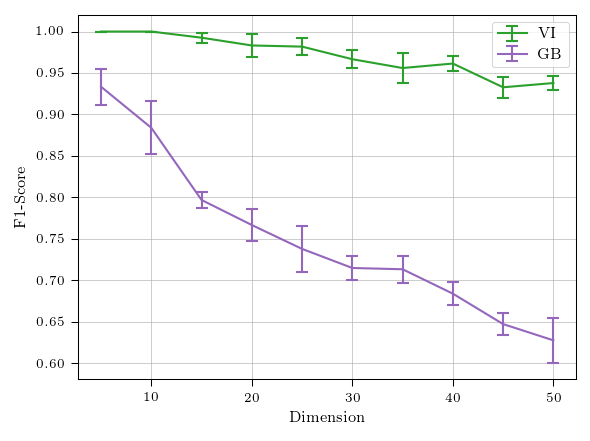

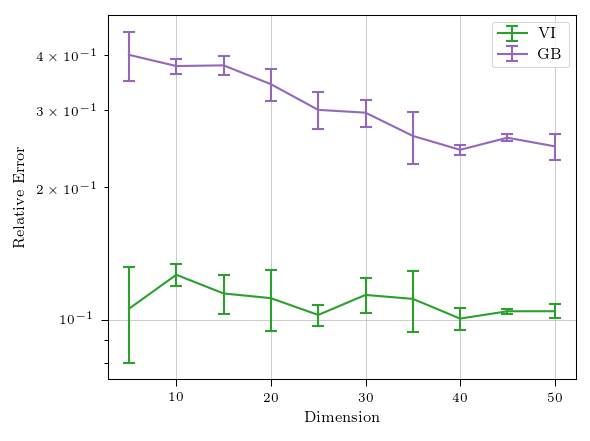

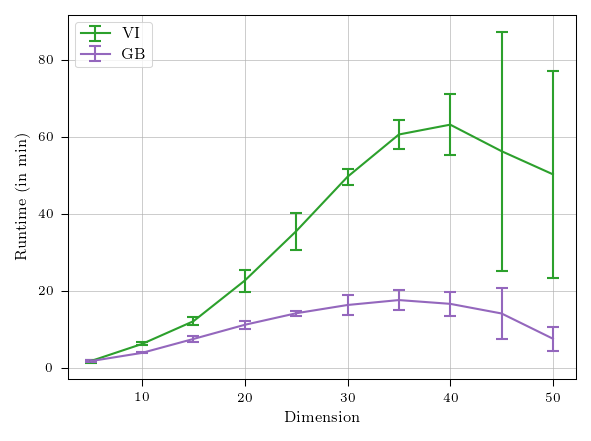

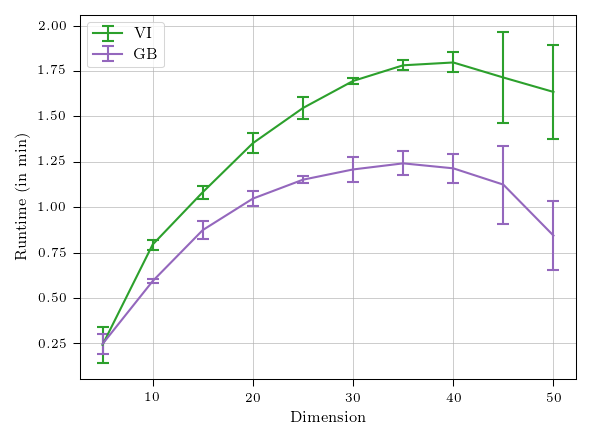

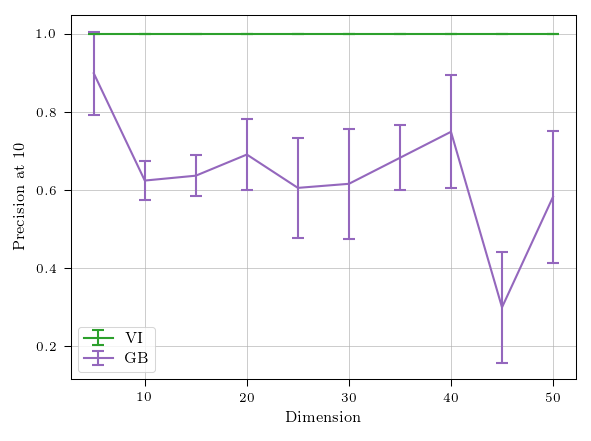

In [19]:
plot_meta_data = [
#    ('acc', 'Accuracy'),
    ('f1score', 'F1-Score'), 
    ('relerr', 'Relative Error'),
    
    ('runtime_lin', f'Runtime (in {unit})'),
    ('runtime_log', f'Runtime (in {unit})'),
    
    #('precAt5', 'Precision at 5'),
    ('precAt10', 'Precision at 10'),
    #('precAt20', 'Precision at 20')
]

queries_list = [
    #('mle',                'MLE',          'C0', '-'), 
    #('bbvi_mean',          'BBVI (mean)',  'C1', '-'), 
    #('bbvi_mode',          'BBVI (mode)',  'C1', ':'),
    ('vi',                  'VI',    'C2', '-'),
    #('vi_mode',            'VI (mode)',    'C2', ':'),
    #('vi_fixed_beta_mean', 'VI-fb (mean)', 'C3', '-'),
    #('vi_fixed_beta_mode', 'VI-fb (mode)', 'C3', ':'),
    ('gb',                 'GB',           'C4', '-'),
]

for prefix, ylabel in plot_meta_data:

    plt.figure(figsize=(3.95, 2.95))
    plt.grid()
    for suf, label, color, ls in queries_list:
        col = '_'.join([prefix, suf])
        print(col)
        print(plot_df[col]['mean'])
        plt.errorbar(plot_df.index, plot_df[col]['mean'], yerr=plot_df[col]['std'], 
                     label=label, color=color, linestyle=ls)
    plt.legend()
    plt.xlabel('Dimension')
    #plt.xscale('log')
    plt.ylabel(ylabel);
    
    if prefix == 'relerr':
        plt.yscale('log')
        pass
        
    if prefix == 'runtime':
        plt.yscale('log')
        pass
    
    plt.tight_layout()
    plt.savefig(f'/Users/trouleau/Desktop/fig-{prefix}.pdf')